In [12]:
import xarray
import numpy as np
import matplotlib.pyplot as plt

In [13]:
ds = xarray.open_dataset('http://pong.tamu.edu/thredds/dodsC/NcML/txla_hindcast_agg')
ds

<xarray.Dataset>
Dimensions:         (tracer: 6, s_rho: 30, s_w: 31, eta_rho: 191, xi_rho: 671, eta_u: 191, xi_u: 670, eta_v: 190, xi_v: 671, eta_psi: 190, xi_psi: 670, ocean_time: 259320)
Coordinates:
  * s_rho           (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w             (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 1993-01-01T01:00:00 ... 2021-...
Dimensions without coordinates: tracer, eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/104)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    shuffle         int32 ...
    ...              ...
    Uwind           (ocean_time, eta_rho, xi_rho) float32 ...
    Vwind           (ocean_time, eta_rho, xi_rho) float32 ...
    shflux          (ocean_time, eta_rho, xi_rho) float32 ...
    ssflux          (ocean_time, eta_rho, xi_rho) float32 ...
    sustr           (ocean_time, eta_u, xi_u) float32 ...
    svstr           (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/34)
    file:                      /scratch/user/d.kobashi/projects/hindcasts/pro...
    format:                    netCDF-4/HDF5 file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     Texas-Louisiana shelf hindcast with dyes
    var_info:                  varinfo.dat
    ...                        ...
    tiling:                    010x012
    history:                   ROMS/TOMS, Version 3.7, Tuesday - August 31, 2...
    ana_file:                  /scratch/user/d.kobashi/source_code/COAWST/Fun...
    CPP_options:               TXLA2, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA...
    EXTRA_DIMENSION.N:         30
    EXTRA_DIMENSION.boundary:  4

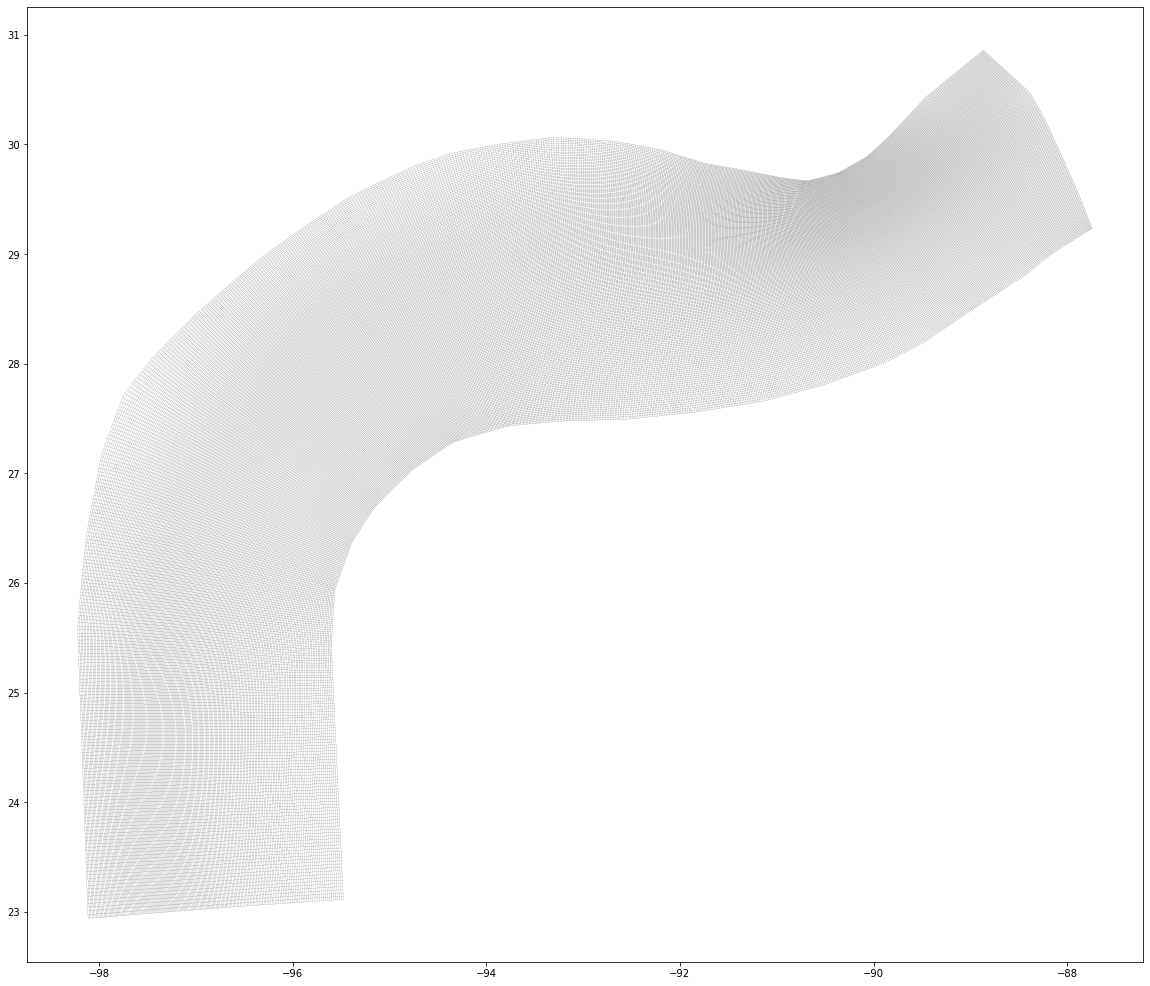

In [15]:
llaspect = 1.0/np.cos(np.pi*ds.lat_rho.values.mean()/180.0)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.plot(ds.lon_rho.values, ds.lat_rho.values, '-k', lw=0.1)
ax.plot(ds.lon_rho.values.T, ds.lat_rho.values.T, '-k', lw=0.1)
ax.set_aspect(llaspect)

/var/folders/y_/vp5v56qd4nj5b07f89_ww3fnsbfrqc/T/ipykernel_14735/1103705563.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(ds.lon_rho.values, ds.lat_rho.values, np.log10(hmask))


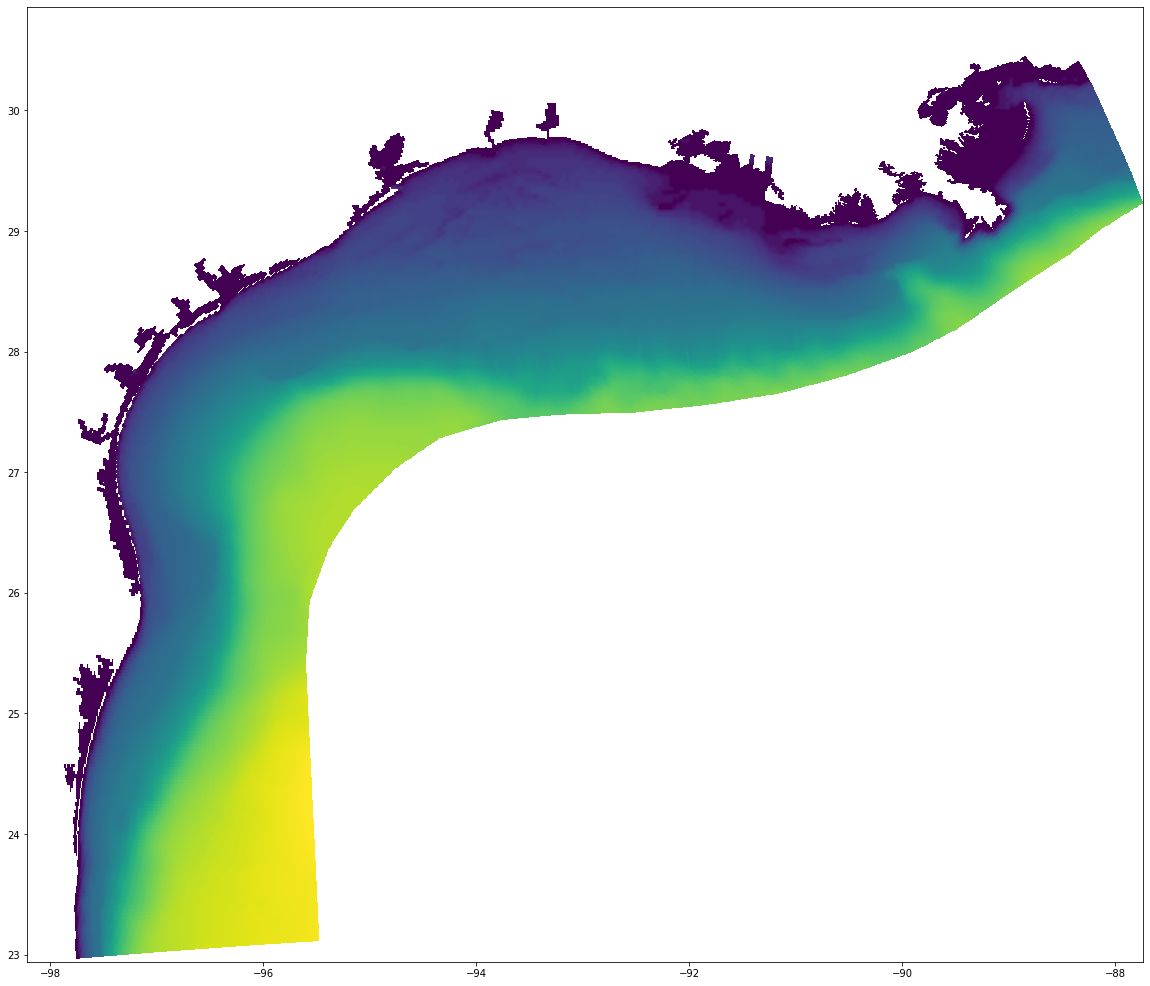

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
hmask = np.ma.masked_where(ds.mask_rho.values==0, ds.h.values)
ax.pcolormesh(ds.lon_rho.values, ds.lat_rho.values, np.log10(hmask))
ax.set_aspect(llaspect)

In [16]:
np.ma.masked_where?

Signature: np.ma.masked_where(condition, a, copy=True)
Docstring:
Mask an array where a condition is met.

Return `a` as an array masked where `condition` is True.
Any masked values of `a` or `condition` are also masked in the output.

Parameters
----------
condition : array_like
    Masking condition.  When `condition` tests floating point values for
    equality, consider using ``masked_values`` instead.
a : array_like
    Array to mask.
copy : bool
    If True (default) make a copy of `a` in the result.  If False modify
    `a` in place and return a view.

Returns
-------
result : MaskedArray
    The result of masking `a` where `condition` is True.

See Also
--------
masked_values : Mask using floating point equality.
masked_equal : Mask where equal to a given value.
masked_not_equal : Mask where `not` equal to a given value.
masked_less_equal : Mask where less than or equal to a given value.
masked_greater_equal : Mask where greater than or equal to a given value.
masked_less : Mas